In [1]:
%load_ext autoreload
%autoreload 2

import pathlib
import pickle
import os

import numpy as np
import pandas as pd

from scipy import signal

import mne
from matplotlib import pyplot as plt

import constants
import dataset
import folders
import iter_topography_fork
import analysis_and_plotting_functions as aps


In [2]:
plt.rcParams['figure.figsize'] = [15,7]
plt.rcParams.update({'font.size': 8})

In [3]:
dbp = pathlib.Path(r'C:\Data\sensortech\BrailleBCI\database_test')
mp = pathlib.Path(r'C:\Data\sensortech\BrailleBCI\results\markup_test.csv')                   

In [7]:
constants.events_offset = 0.06

ds = dataset.EpDatasetCreator( markup_path=mp,
                               database_path=dbp,
                            data_folder=folders.raw_data_folder,
                            reference_mode=[],
                            ICA=False,
                            fit_with_additional_lowpass=False,
                            ecg_analysis=None)

Cleared data folder at C:\Data\sensortech\BrailleBCI\database_test
Created data folder at C:\Data\sensortech\BrailleBCI\database_test
C:\Data\sensortech\BrailleBCI\results\test\testfd2
applying [] refrence
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ri

In [8]:
# Load dataset into memory (if short of memory, use preload=False)
ds = dataset.DatasetReader(data_path=dbp, preload=True)

100 percent complete

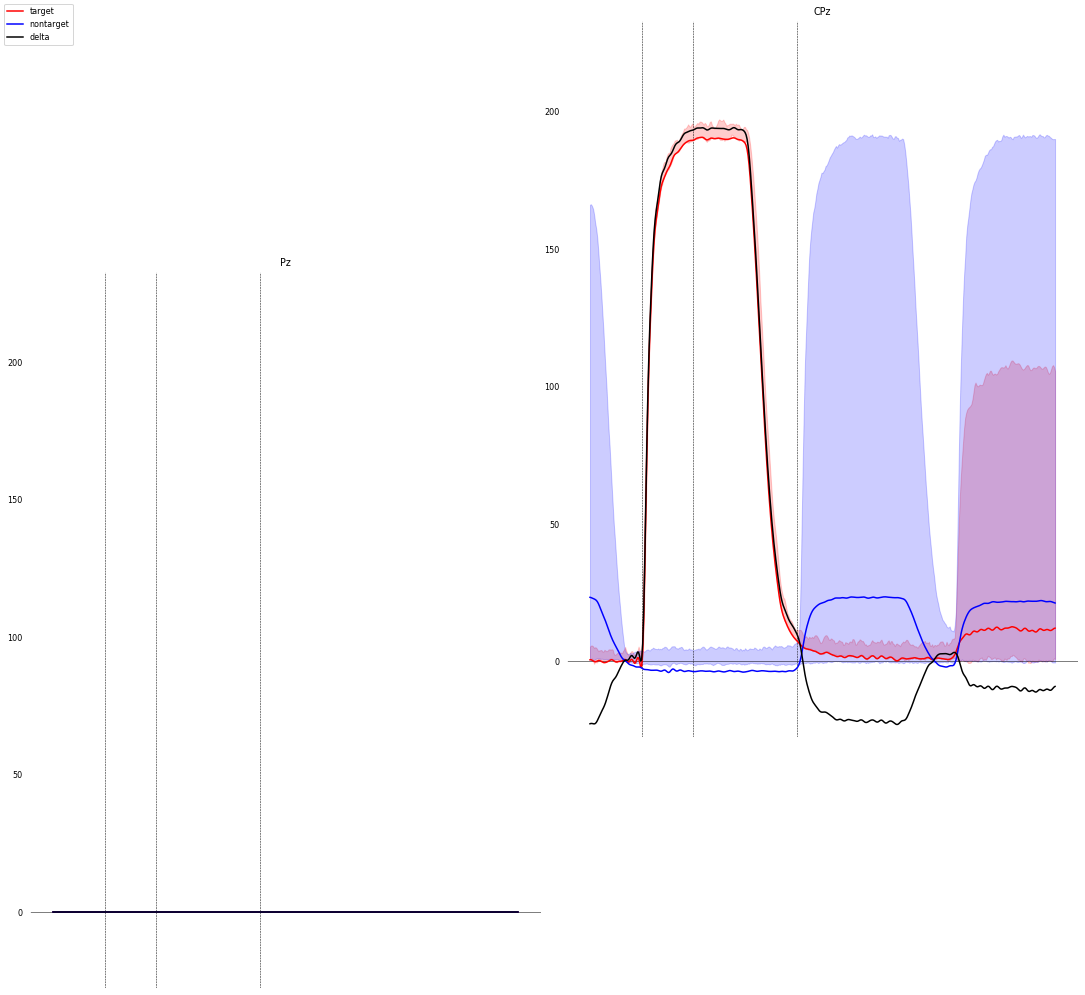

In [9]:
reg = 'brl_static6_all8'

subset_blind = ds.markup.loc[ (ds.markup['reg'] == reg)]
evoked_blind = aps.subset(ds, subset_blind, drop_channels=[a for a in constants.ch_names if a not in 'CPz'], quantiles=[0.5,0.95])



pl = aps.plot_evoked_response(evoked_dict=evoked_blind)